In [81]:
import requests
from bs4 import BeautifulSoup

In [127]:
baseUrl = "https://api.genius.com"
clientAccessToken = "MPG2z5BsA7CncJ2Px0OubU8kaIlz2i791gYakRoHkiMRO9YnCPUvrjl2TrP9B0Ro"
headers = {'Authorization': "Bearer {}".format(clientAccessToken)}

In [128]:
def getRequest(searchTerm):
  searchUrl = baseUrl+"/search"
  geniusSearchUrl = searchUrl + f"?q={searchTerm}"
  response = requests.get(geniusSearchUrl, headers = headers)
  if response.status_code == 200:
    return response
  else:
    print("error status_code not 200")

**Json Response of the GENIUS API**

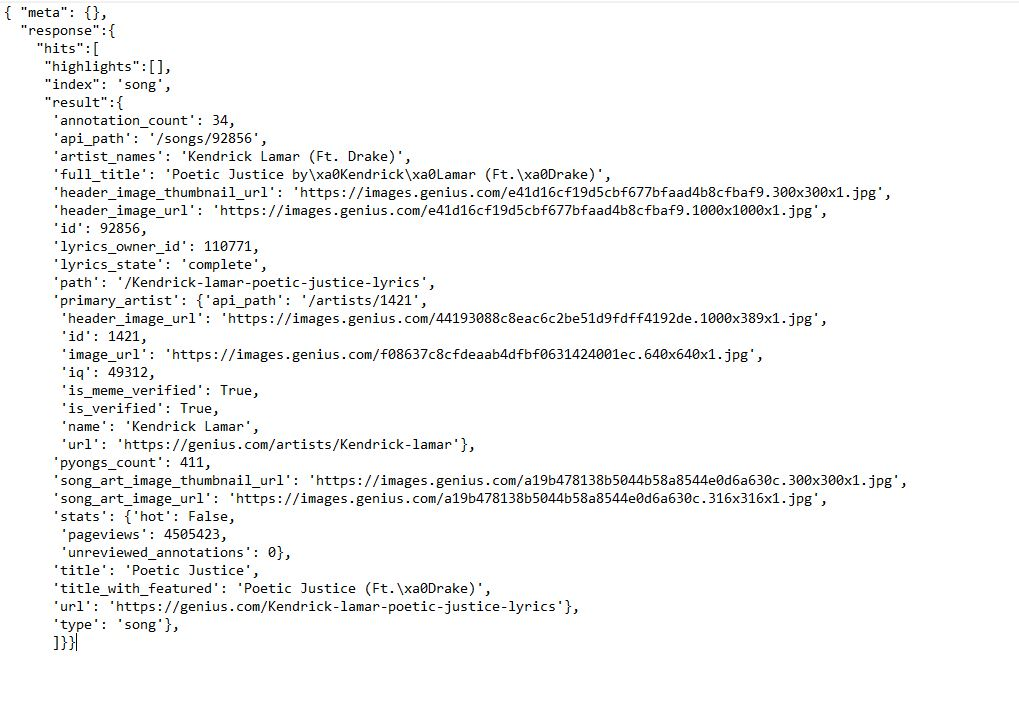

# The Best Popular Rappers of all time (Acc. to Ranker)


In [111]:
bestRappers = ["Eminem","Kendrick Lamar","J. Cole","Snoop Dogg","Tupac","The Notorious B.I.G.", "Nas", "Lil Wayne", "Ice Cube", "Dr. Dre"]

**The above list has the best rappers of all time, now we will gather the lyrics of the top 10 songs from each rapper in order to do further analysis on the them using NLP**

In [113]:
rappertop10LyricData = {}

In [114]:
for rapper in bestRappers:
  rappertop10LyricData[rapper] = []
  jsonResponse = getRequest(rapper).json()
  for data in jsonResponse['response']['hits']:
    print(data['result']['url'], data['result']['full_title'], data['result']['api_path'])


https://genius.com/Eminem-rap-god-lyrics Rap God by Eminem /songs/235729
https://genius.com/Eminem-killshot-lyrics Killshot by Eminem /songs/3958196
https://genius.com/Eminem-godzilla-lyrics Godzilla by Eminem (Ft. Juice WRLD) /songs/5180439
https://genius.com/Eminem-lose-yourself-lyrics Lose Yourself by Eminem /songs/207
https://genius.com/Eminem-the-monster-lyrics The Monster by Eminem (Ft. Rihanna) /songs/235732
https://genius.com/Eminem-lucky-you-lyrics Lucky You by Eminem (Ft. Joyner Lucas) /songs/3930558
https://genius.com/Eminem-the-ringer-lyrics The Ringer by Eminem /songs/3930546
https://genius.com/Eminem-without-me-lyrics Without Me by Eminem /songs/811
https://genius.com/Eminem-river-lyrics River by Eminem (Ft. Ed Sheeran) /songs/3350680
https://genius.com/Eminem-stan-lyrics Stan by Eminem (Ft. Dido) /songs/772
https://genius.com/Kendrick-lamar-humble-lyrics HUMBLE. by Kendrick Lamar /songs/3039923
https://genius.com/Kendrick-lamar-maad-city-lyrics ​m.A.A.d city by Kendrick 

In [131]:
response = requests.get(baseUrl+"/songs/1398", headers = headers)

In [135]:
json = response.json()
path = json['response']['song']['path']

In [139]:
page = requests.get("https://genius.com"+path)

In [140]:
page.text

'<!doctype html>\n<html>\n  <head>\n    <title>Dr.\xa0Dre – Fuck Wit Dre Day (And Everybody’s Celebratin’) Lyrics | Genius Lyrics</title>\n\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<meta content=\'width=device-width,initial-scale=1\' name=\'viewport\'>\n\n  <meta name="apple-itunes-app" content="app-id=709482991">\n\n<link href="https://assets.genius.com/images/apple-touch-icon.png?1644528913" rel="apple-touch-icon" />\n\n\n  \n\n  <link href="https://assets.genius.com/images/apple-touch-icon.png?1644528913" rel="apple-touch-icon" />\n\n  \n\n  <!-- Mobile IE allows us to activate ClearType technology for smoothing fonts for easy reading -->\n  <meta http-equiv="cleartype" content="on">\n\n\n\n\n<META name="y_key" content="f63347d284f184b0">\n\n<meta property="og:site_name" content="Genius"/>\n<meta property="fb:app_id" content="265539304824" />\n<meta property="fb:pages" content="308252472676410" />\n\n<link title="Genius" type="application/opensearchdes

In [144]:
html = BeautifulSoup(page.text, "html.parser")
[h.extract() for h in html("script")]
lyrics = html.find("div", class_="lyrics").get_text() 

AttributeError: ignored

In [147]:
html("div").findAll(class_ = "lyrics")

AttributeError: ignored